Step Activation (AND): Converged in 130 epochs. Final weights: [-0.1   0.1   0.05]


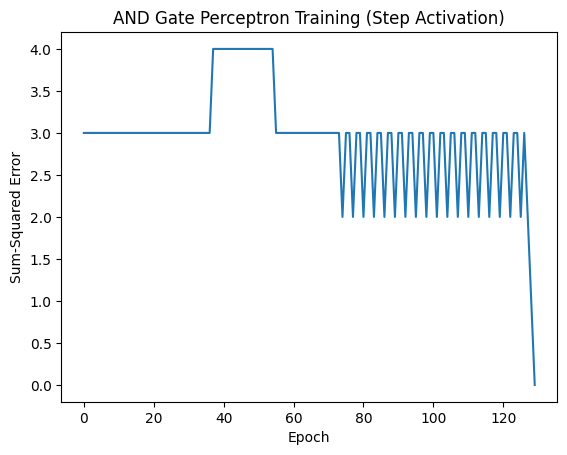

Bipolar Step Activation (AND): Converged in 1000 epochs. Final weights: [-0.1   0.1   0.05]
Sigmoid Activation (AND): Converged in 1000 epochs. Final weights: [-6.13531308  3.97083321  3.96394835]
ReLU Activation (AND): Converged in 390 epochs. Final weights: [-0.92774472  0.95116001  0.94981086]


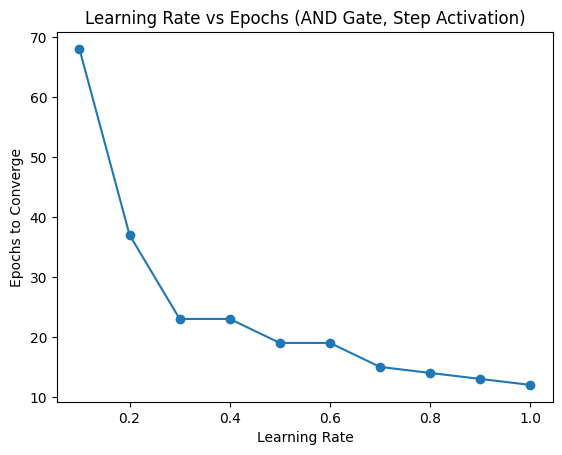

Step Activation (XOR): Converged in 1000 epochs. Final weights: [ 0.1 -0.1 -0.1]
Cancer Data (Sigmoid): Converged in 1000 epochs. Final weights: [-37.84923441   1.77313051   0.62690514]
Pseudo-inverse weights: [-1.35169389  0.09136515  0.02247502]


In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# --- Activation Functions ---
def step(x):
    return 1 if x >= 0 else 0

def bipolar_step(x):
    return 1 if x >= 0 else -1

def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def tanh(x):
    return np.tanh(x)

def relu(x):
    return max(0, x)

def leaky_relu(x, alpha=0.01):
    return x if x > 0 else alpha * x

# --- Summation Unit ---
def summation(inputs, weights):
    return np.dot(inputs, weights)

# --- Comparator (Sum-Squared Error) ---
def sum_squared_error(y_true, y_pred):
    return np.sum((y_true - y_pred) ** 2)

# --- Perceptron Learning ---
def perceptron_train(X, y, weights, lr, activation_func, max_epochs=1000, tol=0.002):
    errors = []
    for epoch in range(max_epochs):
        total_error = 0
        for i in range(len(X)):
            summ = summation(X[i], weights)
            output = activation_func(summ)
            error = y[i] - output
            weights += lr * error * X[i]
            total_error += error ** 2
        errors.append(total_error)
        if total_error <= tol:
            break
    return weights, errors, epoch+1

# --- Main Program ---
if __name__ == "__main__":
    # AND Gate Data
    X_and = np.array([[1,0,0], [1,0,1], [1,1,0], [1,1,1]])  # bias, A, B
    y_and = np.array([0, 0, 0, 1])

    # Initial weights and learning rate
    w_init = np.array([10, 0.2, -0.75])
    lr = 0.05

    # A2: Train Perceptron with Step Activation for AND Gate
    weights, errors, epochs = perceptron_train(X_and, y_and, w_init.copy(), lr, step)
    print(f"Step Activation (AND): Converged in {epochs} epochs. Final weights: {weights}")
    plt.plot(errors)
    plt.xlabel("Epoch")
    plt.ylabel("Sum-Squared Error")
    plt.title("AND Gate Perceptron Training (Step Activation)")
    plt.show()

    # A3: Compare with other activations
    activations = {'Bipolar Step': bipolar_step, 'Sigmoid': sigmoid, 'ReLU': relu}
    for name, func in activations.items():
        weights, errors, epochs = perceptron_train(X_and, y_and, w_init.copy(), lr, func)
        print(f"{name} Activation (AND): Converged in {epochs} epochs. Final weights: {weights}")

    # A4: Vary learning rate
    lrs = np.arange(0.1, 1.1, 0.1)
    epoch_counts = []
    for lr_val in lrs:
        _, _, epochs = perceptron_train(X_and, y_and, w_init.copy(), lr_val, step)
        epoch_counts.append(epochs)
    plt.plot(lrs, epoch_counts, marker='o')
    plt.xlabel("Learning Rate")
    plt.ylabel("Epochs to Converge")
    plt.title("Learning Rate vs Epochs (AND Gate, Step Activation)")
    plt.show()

    # A5: Repeat for XOR Gate
    X_xor = np.array([[1,0,0], [1,0,1], [1,1,0], [1,1,1]])
    y_xor = np.array([0, 1, 1, 0])
    weights, errors, epochs = perceptron_train(X_xor, y_xor, w_init.copy(), lr, step)
    print(f"Step Activation (XOR): Converged in {epochs} epochs. Final weights: {weights}")

    # A6: Cancer_Data.csv - Perceptron for Classification
    df = pd.read_csv("Cancer_Data.csv")
    # For demo, use radius_mean and texture_mean as features, diagnosis as target (M=1, B=0)
    df['diagnosis'] = df['diagnosis'].map({'M':1, 'B':0})
    X_cancer = df[['radius_mean', 'texture_mean']].values
    X_cancer = np.hstack([np.ones((X_cancer.shape[0], 1)), X_cancer])  # Add bias
    y_cancer = df['diagnosis'].values
    w_cancer_init = np.zeros(X_cancer.shape[1])
    weights, errors, epochs = perceptron_train(X_cancer, y_cancer, w_cancer_init, 0.01, sigmoid)
    print(f"Cancer Data (Sigmoid): Converged in {epochs} epochs. Final weights: {weights}")

    # A7: Compare with pseudo-inverse
    X_pinv = np.linalg.pinv(X_cancer)
    w_pinv = X_pinv @ y_cancer
    print(f"Pseudo-inverse weights: {w_pinv}")



--- A8: Neural Network with Backpropagation for AND Gate ---
Converged in 1000 epochs
Final weights (input-hidden): 
[[-0.1538247   0.70497108]
 [-1.19587382 -0.88095954]
 [-0.25104986 -1.48967144]]
Final weights (hidden-output): 
[[-1.21972694]
 [-1.95113646]]
Predictions: 
[[0.13366629]
 [0.24985799]
 [0.24211653]
 [0.37402166]]


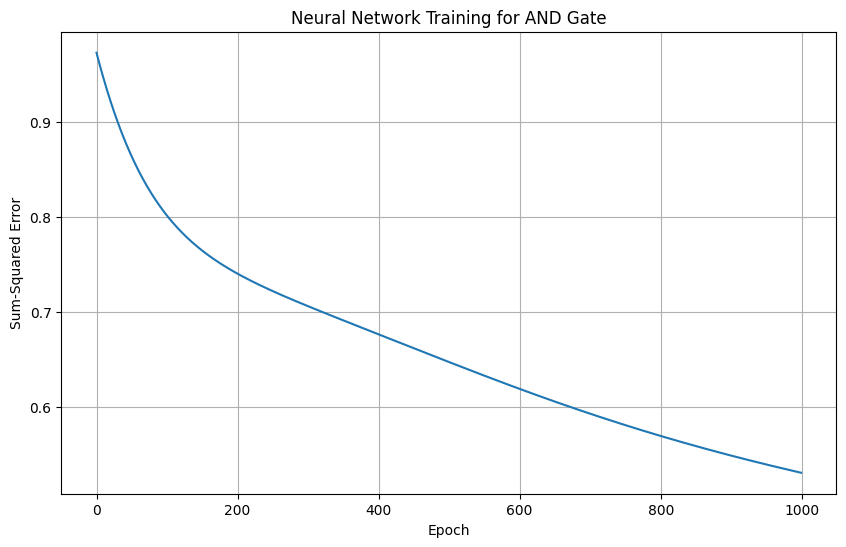


--- A9: Neural Network with Backpropagation for XOR Gate ---
Converged in 1000 epochs
Final weights (input-hidden): 
[[-0.4421434   0.06728731]
 [-0.10227766  0.26531867]
 [ 0.01141484 -0.3761507 ]]
Final weights (hidden-output): 
[[-0.18154154]
 [ 0.13306549]]
Predictions: 
[[0.49943644]
 [0.49620512]
 [0.5027104 ]
 [0.49948686]]


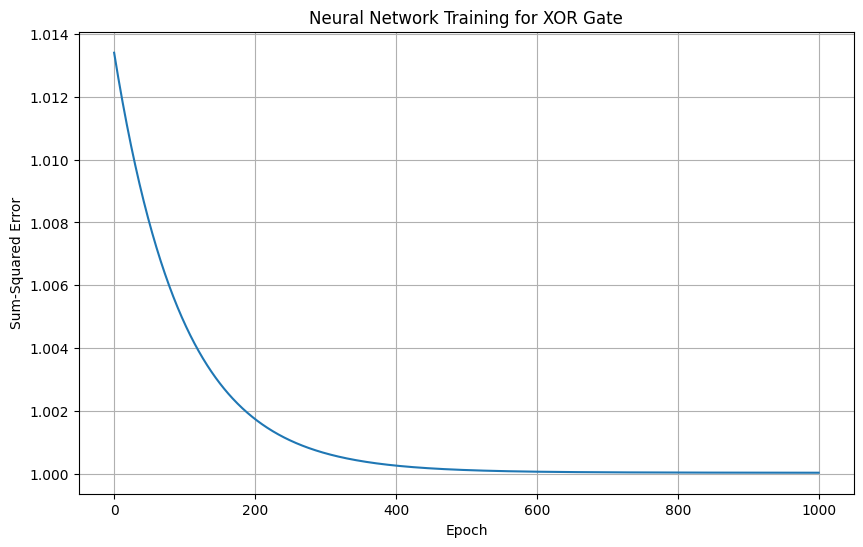


--- A10: Neural Network with 2 Output Nodes (AND Gate) ---
Converged in 1000 epochs
Final weights (input-hidden): 
[[ 1.19648664 -0.29834027 -0.27074889  0.75498771]
 [-1.34698034 -0.5990003   0.567764   -1.17829515]
 [-1.63977171 -0.1899449   0.52386679 -1.0670603 ]]
Final weights (hidden-output): 
[[ 2.23146202 -1.68102767]
 [ 0.43869582 -0.19571733]
 [-0.53529294  0.75798491]
 [ 0.72682552 -1.7180586 ]]
Predictions: 
[[0.8968964  0.09841467]
 [0.73982652 0.26288895]
 [0.75758748 0.2536801 ]
 [0.54778271 0.48017749]]

--- A10: Neural Network with 2 Output Nodes (XOR Gate) ---
Converged in 1000 epochs
Final weights (input-hidden): 
[[ 0.26300211  0.39793934 -0.18110259  0.2667403 ]
 [-0.22883555  0.46791438 -0.09872358  0.09004386]
 [-0.37476401 -0.22055157 -0.36355715  0.13328003]]
Final weights (hidden-output): 
[[ 0.25821615  0.09323123]
 [-0.08170005 -0.39163894]
 [-0.03761578  0.03955848]
 [-0.0994947   0.30708517]]
Predictions: 
[[0.50591568 0.50258202]
 [0.50101538 0.50731023]

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score

# --- Activation Functions ---
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def sigmoid_derivative(x):
    return x * (1 - x)

# --- Neural Network Functions ---
def initialize_weights(input_size, hidden_size, output_size):
    """Initialize weights with small random values."""
    weights_input_hidden = np.random.uniform(-0.5, 0.5, (input_size, hidden_size))
    weights_hidden_output = np.random.uniform(-0.5, 0.5, (hidden_size, output_size))
    return weights_input_hidden, weights_hidden_output

def forward_pass(X, weights_input_hidden, weights_hidden_output):
    """Forward pass through the network."""
    hidden_input = np.dot(X, weights_input_hidden)
    hidden_output = sigmoid(hidden_input)
    final_input = np.dot(hidden_output, weights_hidden_output)
    final_output = sigmoid(final_input)
    return hidden_output, final_output

def backpropagation(X, y, hidden_output, final_output, weights_input_hidden, weights_hidden_output, learning_rate):
    """Backpropagation algorithm to update weights."""
    # Calculate output layer error
    output_error = y - final_output
    output_delta = output_error * sigmoid_derivative(final_output)

    # Calculate hidden layer error
    hidden_error = output_delta.dot(weights_hidden_output.T)
    hidden_delta = hidden_error * sigmoid_derivative(hidden_output)

    # Update weights
    weights_hidden_output += hidden_output.T.dot(output_delta) * learning_rate
    weights_input_hidden += X.T.dot(hidden_delta) * learning_rate

    return weights_input_hidden, weights_hidden_output, np.sum(output_error**2)

def train_neural_network(X, y, hidden_size, learning_rate, max_epochs, tolerance):
    """Train neural network using backpropagation."""
    # Get dimensions
    input_size = X.shape[1]
    output_size = y.shape[1] if len(y.shape) > 1 else 1

    # Initialize weights
    weights_input_hidden, weights_hidden_output = initialize_weights(input_size, hidden_size, output_size)

    # Lists to store error history
    errors = []

    # Training loop
    for epoch in range(max_epochs):
        hidden_output, final_output = forward_pass(X, weights_input_hidden, weights_hidden_output)
        weights_input_hidden, weights_hidden_output, error = backpropagation(
            X, y, hidden_output, final_output, weights_input_hidden, weights_hidden_output, learning_rate
        )
        errors.append(error)

        # Check for convergence
        if error <= tolerance:
            break

    return weights_input_hidden, weights_hidden_output, errors, epoch+1

def predict(X, weights_input_hidden, weights_hidden_output):
    """Make predictions using trained weights."""
    _, y_pred = forward_pass(X, weights_input_hidden, weights_hidden_output)
    return y_pred

# --- A8: Neural Network for AND Gate ---
def neural_network_for_and_gate():
    """Implement neural network for AND gate using backpropagation."""
    # AND Gate data with bias
    X = np.array([[1, 0, 0], [1, 0, 1], [1, 1, 0], [1, 1, 1]])
    y = np.array([[0], [0], [0], [1]])

    # Parameters
    hidden_size = 2
    learning_rate = 0.05
    max_epochs = 1000
    tolerance = 0.002

    # Train network
    weights_input_hidden, weights_hidden_output, errors, epochs = train_neural_network(
        X, y, hidden_size, learning_rate, max_epochs, tolerance
    )

    # Predictions after training
    predictions = predict(X, weights_input_hidden, weights_hidden_output)

    return weights_input_hidden, weights_hidden_output, errors, epochs, predictions

# --- A9: Neural Network for XOR Gate ---
def neural_network_for_xor_gate():
    """Implement neural network for XOR gate using backpropagation."""
    # XOR Gate data with bias
    X = np.array([[1, 0, 0], [1, 0, 1], [1, 1, 0], [1, 1, 1]])
    y = np.array([[0], [1], [1], [0]])

    # Parameters
    hidden_size = 2
    learning_rate = 0.05
    max_epochs = 1000
    tolerance = 0.002

    # Train network
    weights_input_hidden, weights_hidden_output, errors, epochs = train_neural_network(
        X, y, hidden_size, learning_rate, max_epochs, tolerance
    )

    # Predictions after training
    predictions = predict(X, weights_input_hidden, weights_hidden_output)

    return weights_input_hidden, weights_hidden_output, errors, epochs, predictions

# --- A10: Neural Network with 2 Output Nodes ---
def neural_network_with_two_outputs(gate_type='AND'):
    """Implement neural network with 2 output nodes."""
    # Data with bias
    X = np.array([[1, 0, 0], [1, 0, 1], [1, 1, 0], [1, 1, 1]])

    # Two output nodes: [1,0] for 0 and [0,1] for 1
    if gate_type == 'AND':
        y = np.array([[1, 0], [1, 0], [1, 0], [0, 1]])  # AND gate
    else:  # XOR
        y = np.array([[1, 0], [0, 1], [0, 1], [1, 0]])  # XOR gate

    # Parameters
    hidden_size = 4  # Increase hidden size for more complex mapping
    learning_rate = 0.05
    max_epochs = 1000
    tolerance = 0.002

    # Train network
    weights_input_hidden, weights_hidden_output, errors, epochs = train_neural_network(
        X, y, hidden_size, learning_rate, max_epochs, tolerance
    )

    # Predictions after training
    predictions = predict(X, weights_input_hidden, weights_hidden_output)

    return weights_input_hidden, weights_hidden_output, errors, epochs, predictions

# --- A11: MLPClassifier from Scikit-learn ---
def mlp_classifier_for_gates():
    """Use MLPClassifier from scikit-learn for AND and XOR gates."""
    # AND Gate data
    X_and = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
    y_and = np.array([0, 0, 0, 1])

    # XOR Gate data
    X_xor = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
    y_xor = np.array([0, 1, 1, 0])

    # Create and train MLPClassifier for AND gate
    mlp_and = MLPClassifier(hidden_layer_sizes=(2,), activation='logistic',
                          learning_rate_init=0.05, max_iter=1000, random_state=42)
    mlp_and.fit(X_and, y_and)

    # Create and train MLPClassifier for XOR gate
    mlp_xor = MLPClassifier(hidden_layer_sizes=(2,), activation='logistic',
                          learning_rate_init=0.05, max_iter=1000, random_state=42)
    mlp_xor.fit(X_xor, y_xor)

    # Predictions
    and_predictions = mlp_and.predict(X_and)
    xor_predictions = mlp_xor.predict(X_xor)

    # Accuracy
    and_accuracy = accuracy_score(y_and, and_predictions)
    xor_accuracy = accuracy_score(y_xor, xor_predictions)

    return mlp_and, mlp_xor, and_predictions, xor_predictions, and_accuracy, xor_accuracy

# --- Main Program ---
if __name__ == "__main__":
    # A8: Neural Network for AND Gate
    print("\n--- A8: Neural Network with Backpropagation for AND Gate ---")
    wih_and, who_and, errors_and, epochs_and, predictions_and = neural_network_for_and_gate()
    print(f"Converged in {epochs_and} epochs")
    print(f"Final weights (input-hidden): \n{wih_and}")
    print(f"Final weights (hidden-output): \n{who_and}")
    print(f"Predictions: \n{predictions_and}")

    # Plot errors for AND gate
    plt.figure(figsize=(10, 6))
    plt.plot(errors_and)
    plt.xlabel('Epoch')
    plt.ylabel('Sum-Squared Error')
    plt.title('Neural Network Training for AND Gate')
    plt.grid(True)
    plt.show()

    # A9: Neural Network for XOR Gate
    print("\n--- A9: Neural Network with Backpropagation for XOR Gate ---")
    wih_xor, who_xor, errors_xor, epochs_xor, predictions_xor = neural_network_for_xor_gate()
    print(f"Converged in {epochs_xor} epochs")
    print(f"Final weights (input-hidden): \n{wih_xor}")
    print(f"Final weights (hidden-output): \n{who_xor}")
    print(f"Predictions: \n{predictions_xor}")

    # Plot errors for XOR gate
    plt.figure(figsize=(10, 6))
    plt.plot(errors_xor)
    plt.xlabel('Epoch')
    plt.ylabel('Sum-Squared Error')
    plt.title('Neural Network Training for XOR Gate')
    plt.grid(True)
    plt.show()

    # A10: Neural Network with 2 Output Nodes
    print("\n--- A10: Neural Network with 2 Output Nodes (AND Gate) ---")
    wih_and2, who_and2, errors_and2, epochs_and2, predictions_and2 = neural_network_with_two_outputs('AND')
    print(f"Converged in {epochs_and2} epochs")
    print(f"Final weights (input-hidden): \n{wih_and2}")
    print(f"Final weights (hidden-output): \n{who_and2}")
    print(f"Predictions: \n{predictions_and2}")

    print("\n--- A10: Neural Network with 2 Output Nodes (XOR Gate) ---")
    wih_xor2, who_xor2, errors_xor2, epochs_xor2, predictions_xor2 = neural_network_with_two_outputs('XOR')
    print(f"Converged in {epochs_xor2} epochs")
    print(f"Final weights (input-hidden): \n{wih_xor2}")
    print(f"Final weights (hidden-output): \n{who_xor2}")
    print(f"Predictions: \n{predictions_xor2}")

    # A11: MLPClassifier from Scikit-learn
    print("\n--- A11: MLPClassifier for Logic Gates ---")
    mlp_and, mlp_xor, and_preds, xor_preds, and_acc, xor_acc = mlp_classifier_for_gates()

    print("AND Gate with MLPClassifier:")
    print(f"Predictions: {and_preds}")
    print(f"Accuracy: {and_acc * 100:.2f}%")

    print("\nXOR Gate with MLPClassifier:")
    print(f"Predictions: {xor_preds}")
    print(f"Accuracy: {xor_acc * 100:.2f}%")
